In [2]:
# !pip install agentpy
# Model design
import agentpy as ap
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import IPython

In [170]:
class MyAgent(ap.Agent):
    def setup(self):
        # 1. Initialize agent's attribute: health
        self.health = self.model.random.randint(60,101)

    # Setting initial position
    def setup_pos(self, env):
        self.pos = env.positions[self]

    # Movement simulation
    def move(self):
        new_pos = (self.pos[0] + self.model.random.randint(-1, 2),
                   self.pos[1] + self.model.random.randint(-1, 2))
        
        # 2. Add code to simulate agents movement
        if tuple(new_pos) not in self.model.room.positions.values():
            self.model.room.move_to(self, new_pos)
            self.pos = self.model.room.positions[self]

    def update(self):
        # 3. Update health values
        reduce_health = self.model.random.randint(1,6)
        self.health -= reduce_health

        # Updating position values using the move method
        self.move()

        # 4. Record health data
        self.record('health', self.health)

    def send_message(self, other_agent, message):
        return other_agent.receive_message(self, message)

    def receive_message(self, other_agent, message):
        print(f'\nMessage from {self.id} to {other_agent.id}: {message}')



class MyModel(ap.Model):
    def setup(self):
        # 5. Initialize a grid with the given values
        self.room = ap.Grid(self, (self.p.size, self.p.size), track_empty=True)

        # 6. Add 10 agents of type MyAgent to the environment room at random position
        self.agents = ap.AgentList(self, 10, MyAgent)
        self.room.add_agents(self.agents, random=True, empty=True)

        # Setting position in the pos field of the agents
        self.agents.setup_pos(self.room)

    def find_closest(self, agent):
        closest = None
        min_distance = float('inf')

        for other_agent in self.agents:
            if other_agent != agent:  
                dx = agent.pos[0] - other_agent.pos[0]
                dy = agent.pos[1] - other_agent.pos[1]
                distance = (dx**2 + dy**2)**0.5

                if distance < min_distance:
                    closest = other_agent
                    min_distance = distance
        
        return closest

    def step(self):
        # 7. Update all agents values on each step
        self.room.agents.update()

        # # 7. Filter all agents with health <= 0. Remove them from the environment (room)
        agents_rm = []
        for agent in self.room.agents:
            if agent.health < 0:
                agents_rm.append(agent)

        # # Extra. Find the closest neighbor to the dying agent (the one that will be removed) And send a goodbye message with its id.
        for agent in agents_rm:
            # Find the closest neighbor (assuming agents have a position or similar attribute)
            closest_neighbor = self.find_closest(agent)
            if closest_neighbor:
                agent.send_message(closest_neighbor, "Goodbyee")
        
        if len(agents_rm) > 0:
            self.room.remove_agents(agents_rm)
    
        # # 8. Check if room has agents left. If no agents, stop the simulation
        if len(self.room.agents) <= 0:
            print("Stopping as all agents have no health")
            self.stop()

    def end(self):
        # 9. Report Agent's positions
        self.report('Agents position',  [agent.pos for agent in self.agents])

Completed: 18 steps
Message from 2 to 3: Goodbyee
Completed: 19 steps
Message from 2 to 9: Goodbyee

Message from 4 to 10: Goodbyee
Completed: 20 steps
Message from 3 to 2: Goodbyee
Completed: 21 steps
Message from 7 to 11: Goodbyee
Completed: 23 steps
Message from 5 to 6: Goodbyee
Completed: 24 steps
Message from 2 to 8: Goodbyee
Completed: 26 steps
Message from 8 to 5: Goodbyee

Message from 5 to 7: Goodbyee
Completed: 33 steps
Message from 2 to 4: Goodbyee
Stopping as all agents have no health
Completed: 34 steps
Run time: 0:00:00.006968
Simulation finished
                                      seed  \
0  336797964084289347733343205046291963962   

                                     Agents position  
0  [(9, 9), (9, 9), (9, 9), (9, 8), (8, 5), (8, 7...  


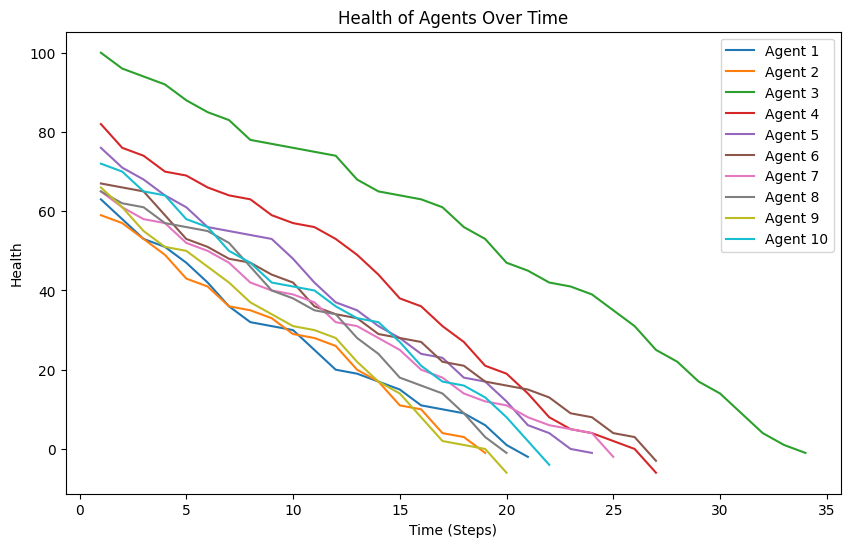

In [171]:
parameters = {'size': 10}
model = MyModel(parameters)
results = model.run()
print(results.reporters)

plt.figure(figsize=(10, 6))

for agent in model.agents:
    log = agent.log
    health_data = log['health']
    time_steps = log['t'] 
    plt.plot(time_steps, health_data, label=f'Agent {agent.id-1}')

# Labels
plt.title('Health of Agents Over Time')
plt.xlabel('Time (Steps)')
plt.ylabel('Health')
plt.legend()

# Show the plot
plt.show()




In [172]:
from IPython.display import HTML

def my_plot(model, ax):
    """Function for plotting"""
    grid = np.zeros(model.room.shape)
    print(model.room.positions)
    for agent, pos in model.room.positions.items():
        grid[pos] = agent.id
    ax.imshow(grid, cmap='Greys')

fig, ax = plt.subplots()
animation = ap.animate(model, fig, ax, my_plot)
HTML(animation.to_jshtml())

{MyAgent (Obj 13): (6, 2), MyAgent (Obj 14): (2, 0), MyAgent (Obj 15): (3, 4), MyAgent (Obj 16): (6, 6), MyAgent (Obj 17): (9, 4), MyAgent (Obj 18): (1, 8), MyAgent (Obj 19): (1, 3), MyAgent (Obj 20): (5, 4), MyAgent (Obj 21): (2, 6), MyAgent (Obj 22): (3, 9)}
{MyAgent (Obj 13): (6, 2), MyAgent (Obj 14): (2, 0), MyAgent (Obj 15): (3, 4), MyAgent (Obj 16): (6, 6), MyAgent (Obj 17): (9, 4), MyAgent (Obj 18): (1, 8), MyAgent (Obj 19): (1, 3), MyAgent (Obj 20): (5, 4), MyAgent (Obj 21): (2, 6), MyAgent (Obj 22): (3, 9)}
{MyAgent (Obj 13): (5, 1), MyAgent (Obj 14): (4, 0), MyAgent (Obj 15): (3, 4), MyAgent (Obj 16): (8, 8), MyAgent (Obj 17): (9, 3), MyAgent (Obj 18): (3, 7), MyAgent (Obj 19): (2, 5), MyAgent (Obj 20): (7, 5), MyAgent (Obj 21): (2, 6), MyAgent (Obj 22): (4, 9)}
{MyAgent (Obj 13): (5, 3), MyAgent (Obj 14): (3, 1), MyAgent (Obj 15): (5, 4), MyAgent (Obj 16): (9, 9), MyAgent (Obj 17): (8, 3), MyAgent (Obj 18): (3, 8), MyAgent (Obj 19): (4, 6), MyAgent (Obj 20): (9, 6), MyAgent 